In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ANZ synthesised transaction dataset.csv')

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null object
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 non-null 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
merchant_code,883.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


In [6]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

We can remove the cells having maximum number of Null values.

In [7]:
df = df.drop(['date', 'merchant_suburb', 'merchant_code', 'bpay_biller_code', 'merchant_id', 'merchant_state', 'merchant_long_lat','card_present_flag', 'transaction_id', 'country','extraction', 'currency'],axis = 1)

In [8]:
def convert (dateStr):
    dateStr = dateStr.split('/')
    month = dateStr[0]
    return month
df['month'] = df['date'].apply(convert)

In [9]:
long_lat = df['long_lat'].str.split("-", n = 1, expand = True)
df['long'] = long_lat[0]
df['lat'] = long_lat[1]
df = df.drop(['long_lat'], axis = 1)

In [10]:
df.head()

,status,account,txn_description,first_name,balance,gender,age,amount,customer_id,movement,month,long,lat
0,authorized,ACC-1598451071,POS,Diana,35.39,F,26,16.25,CUS-2487424745,debit,8,153.41,27.95
1,authorized,ACC-1598451071,SALES-POS,Diana,21.20,F,26,14.19,CUS-2487424745,debit,8,153.41,27.95
2,authorized,ACC-1222300524,POS,Michael,5.71,M,38,6.42,CUS-2142601169,debit,8,151.23,33.94
3,authorized,ACC-1037050564,SALES-POS,Rhonda,2117.22,F,40,40.90,CUS-1614226872,debit,8,153.10,27.66
4,authorized,ACC-1598451071,SALES-POS,Diana,17.95,F,26,3.25,CUS-2487424745,debit,8,153.41,27.95


In [47]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

We can disregard all the POS and look at other modes of transactions to find the average salary and annual salary.

In [12]:
txn_widout_POS = df[df['txn_description'] != 'SALES-POS']

In [13]:
txn_widout_POS = txn_widout_POS[txn_widout_POS['txn_description'] != 'POS']

In [14]:
txn_widout_POS = txn_widout_POS.reset_index(drop=True)

In [15]:
txn_widout_POS = txn_widout_POS.drop(['status', 'movement'], axis = 1)

In [16]:
# change gender to dummy variable
txn_widout_POS = pd.get_dummies(txn_widout_POS, columns = ['gender'], drop_first = True)

In [17]:
txn_widout_POS.head()

,account,txn_description,first_name,balance,age,amount,customer_id,month,long,lat,gender_M
0,ACC-1608363396,PAYMENT,Robert,1705.43,20,163.0,CUS-2688605418,8,151.22,33.87,1
1,ACC-602667573,INTER BANK,Michael,466.58,40,21.0,CUS-2031327464,8,151.23,33.96,1
2,ACC-2171593283,PAYMENT,Fernando,4348.50,19,27.0,CUS-2317998716,8,146.94,36.04,1
3,ACC-2776252858,PAYMENT,Kristin,1203.75,43,29.0,CUS-4123612273,8,144.95,37.76,0
4,ACC-588564840,INTER BANK,Isaiah,4438.16,23,25.0,CUS-1462656821,8,151.27,33.76,1


In [18]:
txn_widout_POS['txn_description'].value_counts()

PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [19]:
customer_ids = list(txn_widout_POS['customer_id'].unique())

In [20]:
customer_addn_data = []

for ids in customer_ids:
    txn_widout_POS_1 = txn_widout_POS[txn_widout_POS['customer_id'] == ids]
    txn_widout_POS_1 = txn_widout_POS_1.reset_index(drop=True)
    account_no = txn_widout_POS_1['account'][0].split('-')[1]
    first_name = txn_widout_POS_1['first_name'][0]
    gender = txn_widout_POS_1['gender_M'][0]
    age = txn_widout_POS_1['age'][0]
    long = txn_widout_POS_1['long'][0]
    lat = txn_widout_POS_1['lat'][0]
    balance = txn_widout_POS_1['balance'][0]
    avg_salary = round(sum(txn_widout_POS_1['amount']) / len(txn_widout_POS_1), 1)
    row = (ids, account_no, first_name, gender, age, long, lat, balance, avg_salary, round(avg_salary * 12,1))
    customer_addn_data.append(row)
    
customer_df = pd.DataFrame(customer_addn_data, columns = ('customer_id','account_no','first_name','gender_Male','age','long','lat','balance','avg_salary','annual_salary'))

In [21]:
customer_df.head()

,customer_id,account_no,first_name,gender_Male,age,long,lat,balance,avg_salary,annual_salary
0,CUS-2688605418,1608363396,Robert,1,20,151.22,33.87,1705.43,587.2,7046.4
1,CUS-2031327464,602667573,Michael,1,40,151.23,33.96,466.58,471.4,5656.8
2,CUS-2317998716,2171593283,Fernando,1,19,146.94,36.04,4348.50,283.0,3396.0
3,CUS-4123612273,2776252858,Kristin,0,43,144.95,37.76,1203.75,354.5,4254.0
4,CUS-1462656821,588564840,Isaiah,1,23,151.27,33.76,4438.16,601.8,7221.6


In [22]:
customer_df.corr().transpose()

,gender_Male,age,balance,avg_salary,annual_salary
gender_Male,1.000000,0.012067,0.125752,0.111610,0.111610
age,0.012067,1.000000,0.237863,-0.011001,-0.011001
balance,0.125752,0.237863,1.000000,0.008250,0.008250
avg_salary,0.111610,-0.011001,0.008250,1.000000,1.000000
annual_salary,0.111610,-0.011001,0.008250,1.000000,1.000000


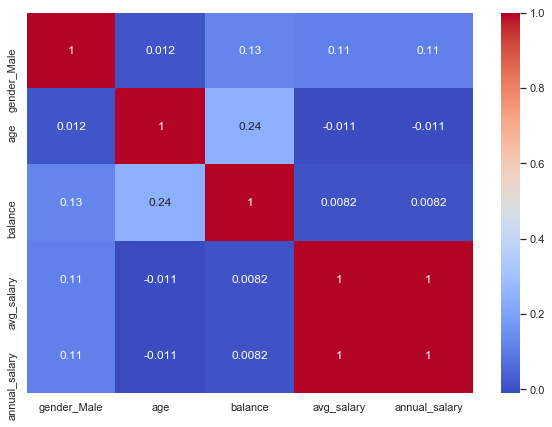

In [51]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(customer_df.corr(), cmap = 'coolwarm', annot = True, robust = True)

In [24]:
customer_df1 = customer_df.drop(['account_no', 'first_name', 'customer_id'], axis = 1)

In [25]:
X = customer_df1.drop('annual_salary', axis = 1).values
y = customer_df1['annual_salary'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

Data Preprocessing

In [28]:
from sklearn import preprocessing
from sklearn import utils

In [29]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

continuous
multiclass
multiclass


In [30]:
test_scores_encoded = lab_enc.fit_transform(y_test)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

continuous
multiclass
multiclass


In [31]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'auto', max_iter = 9500)
log_model.fit(X_train, training_scores_encoded)
preds = log_model.predict(X_test)

In [32]:
# R-squared value of the model
log_model.score(X_train, training_scores_encoded)

0.07142857142857142

In [33]:
# RMSE of the model
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_scores_encoded, preds)))

51.75970118409366


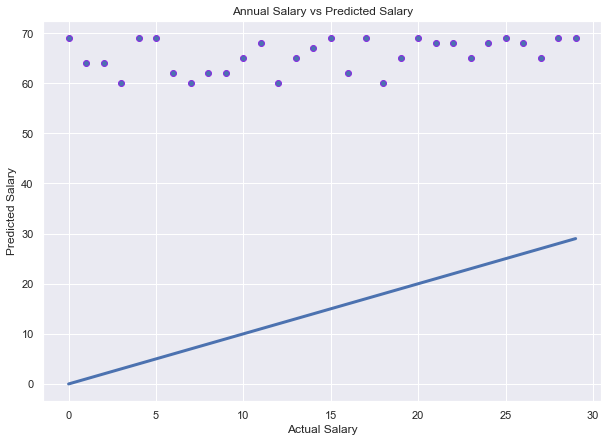

In [34]:
# Plot of predicted salary against actual salary
fig, ax = plt.subplots()
ax.scatter(test_scores_encoded, preds, edgecolors= '#8A2BE2')
ax.plot([test_scores_encoded.min(), test_scores_encoded.max()], [test_scores_encoded.min(), test_scores_encoded.max()], lw=3)
ax.set_xlabel('Actual Salary')
ax.set_ylabel('Predicted Salary')
ax.set_title("Annual Salary vs Predicted Salary")
plt.show()

Logistic Regression Model Conclusion:
The Logistic Regression model achieved an R-squared value of 0.07. As the R-squared value is proximate to 0, it indicates that the model does not justify the variability of the annual salary.

The model also achieved a Root Mean Squared Error (RMSE) of 51.75. It is the square root of the variance of the errors. Errors are a measure of the distance of the data points from the regression line. In general, the lower the RMSE, the better the model's fit is.

Hence, this Logistic Regression model has performed very poorly in predicting the average salary of an ANZ customer.

Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, training_scores_encoded)
predictions = dtree.predict(X_test)

In [36]:
# Print the R-squared value for the model
dtree.score(X_train, training_scores_encoded)

1.0

In [37]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(test_scores_encoded, predictions)))

26.474516048456863


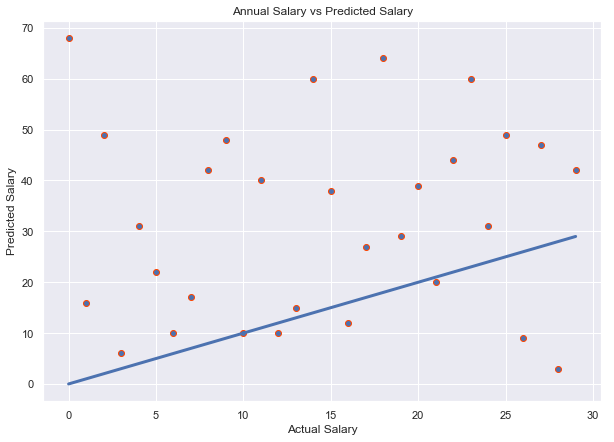

In [38]:
fig, ax = plt.subplots()
ax.scatter(test_scores_encoded, predictions, edgecolors = '#FF4500')
ax.plot([test_scores_encoded.min(), test_scores_encoded.max()], [test_scores_encoded.min(), test_scores_encoded.max()], lw=3)
ax.set_xlabel('Actual Salary')
ax.set_ylabel('Predicted Salary')
ax.set_title("Annual Salary vs Predicted Salary")
plt.show()

Decision Tree Model Conclusion:
The Decision Tree model achieved an R-squared value of 1.0. As the R-squared value is exactly 1, it indicates that the model is able to fit perfectly and justifies the variance of the annual salary.

On the other hand, the model achieved a Root Mean Squared Error (RMSE) of 26.47. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. Here, the RMSE is much lower as compared to the Logistic Regression Model and it indicates a better fit.

Hence, the Decision Tree model has performed better than the Logistic Regression model, as it has a lower RMSE and a perfect R-squared value.

In [39]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [40]:
feature = list(customer_df1.columns[1:])
feature

['age', 'long', 'lat', 'balance', 'avg_salary', 'annual_salary']

In [41]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = feature, filled = True, rounded = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, training_scores_encoded)
rfc_pred = rfc.predict(X_test)

In [43]:
# Print the R-squared value for the model
rfc.score(X_train, training_scores_encoded)

1.0

In [44]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(test_scores_encoded, rfc_pred)))

18.610928688989883


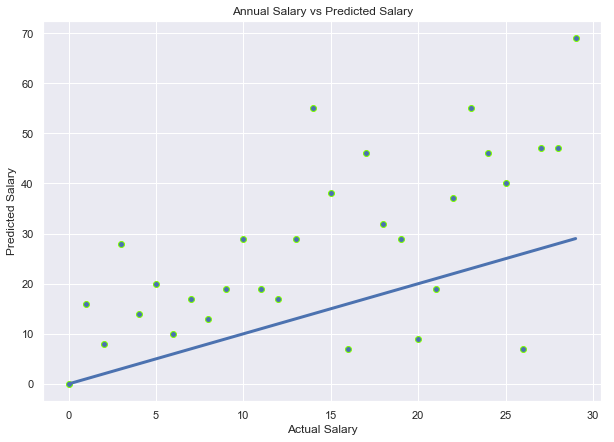

In [45]:
fig, ax = plt.subplots()
ax.scatter(test_scores_encoded, rfc_pred, edgecolors= '#7FFF00')
ax.plot([test_scores_encoded.min(), test_scores_encoded.max()], [test_scores_encoded.min(), test_scores_encoded.max()], lw=3)
ax.set_xlabel('Actual Salary')
ax.set_ylabel('Predicted Salary')
ax.set_title("Annual Salary vs Predicted Salary")
plt.show()

Random Forest Model Conclusion:
The Random Forest model achieved an R-squared value of 1.0. As the R-squared value is exactly 1, it indicates that the model is better able to explain of the variability of the annual salary than the Logistic Regression Model.

On the other hand, the model achieved a Root Mean Squared Error (RMSE) of 18.61. This is much lower than both of the previous models and that indicates even a better fit.

Hence, the Random Forest model has performed better than the previous two models, in terms of precision, as it has a lower RMSE and a perfect R-squared score. This means that the average variance of the resulting model is reduced.

Hence, I do not recommend using none of the models to segment the customers without improving the model. Some room for improvement include adding more relevant variables or using a different type of machine learning model.